In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from utils import preprocess_data
preprocess_data()

In [51]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

<ul>
    <li>PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.</li>
    <li>HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.</li>
    <li>CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</li>
    <li>Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.</li>
    <li>Destination - The planet the passenger will be debarking to.</li>
    <li>Age - The age of the passenger.</li>
    <li>VIP - Whether the passenger has paid for special VIP service during the voyage.</li>
    <li>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.</li>
    <li>Name - The first and last names of the passenger.</li>
    <li>Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</li>
<ul>

In [61]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [84]:
train.describe().T.sort_values(by='std',ascending=False)

,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0


In [85]:
test.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
FoodCourt,4171.0,439.484296,1527.663045,0.0,0.0,0.0,78.0,25273.0
VRDeck,4197.0,310.710031,1246.994742,0.0,0.0,0.0,36.0,22272.0
Spa,4176.0,303.052443,1117.186015,0.0,0.0,0.0,50.0,19844.0
RoomService,4195.0,219.266269,607.011289,0.0,0.0,0.0,53.0,11567.0
ShoppingMall,4179.0,177.295525,560.821123,0.0,0.0,0.0,33.0,8292.0
Age,4186.0,28.658146,14.179072,0.0,19.0,26.0,37.0,79.0


In [56]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [64]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [72]:
def percent_of_null(df: pd.DataFrame):
    null_values_series = df.isnull().sum()
    null_df = pd.DataFrame(
        data=null_values_series,
        columns=['Total_nulls']
    )
    null_df['nulls_per_feature'] = 100 * null_df['Total_nulls']/len(df)
    print(null_df)

In [73]:
percent_of_null(train)

              Total_nulls  nulls_per_feature
PassengerId             0           0.000000
HomePlanet            201           2.312205
CryoSleep             217           2.496261
Cabin                 199           2.289198
Destination           182           2.093639
Age                   179           2.059128
VIP                   203           2.335212
RoomService           181           2.082135
FoodCourt             183           2.105142
ShoppingMall          208           2.392730
Spa                   183           2.105142
VRDeck                188           2.162660
Name                  200           2.300702
Transported             0           0.000000


In [74]:
percent_of_null(test)

              Total_nulls  nulls_per_feature
PassengerId             0           0.000000
HomePlanet             87           2.034136
CryoSleep              93           2.174421
Cabin                 100           2.338087
Destination            92           2.151040
Age                    91           2.127660
VIP                    93           2.174421
RoomService            82           1.917232
FoodCourt             106           2.478373
ShoppingMall           98           2.291326
Spa                   101           2.361468
VRDeck                 80           1.870470
Name                   94           2.197802


Text(0.5, 1.0, 'NullValues in Test')

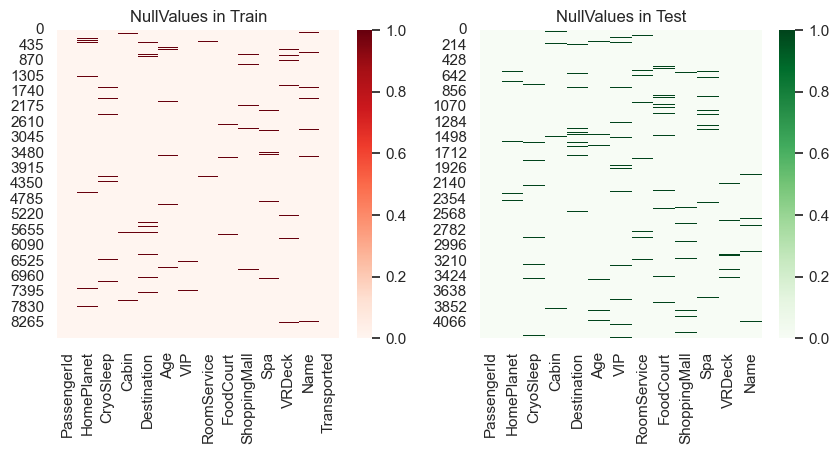

In [82]:
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10,4)
)

sns.heatmap(train.isnull(), ax=axs[0], cmap='Reds')
axs[0].set_title('NullValues in Train')

sns.heatmap(test.isnull(), ax=axs[1], cmap='Greens')
axs[1].set_title('NullValues in Test')

Text(0.5, 0.98, 'Missing Values')

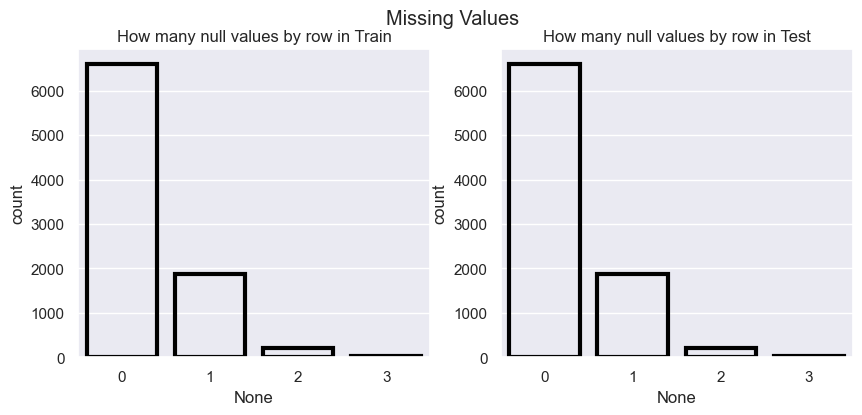

In [108]:
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    figsize=(10,4)
)

train_rnull = train.isnull().sum(axis=1).value_counts()
train_rnull_df = pd.DataFrame(train_rnull)

sns.barplot(x=train_rnull_df.index,
            y=train_rnull_df['count'],
            ax=axs[0],
            lw=3,
            edgecolor = 'black',
            facecolor = (0,0,0,0))
axs[0].set_title('How many null values by row in Train')


test_rnull = train.isnull().sum(axis=1).value_counts()
test_rnull_df = pd.DataFrame(test_rnull)

sns.barplot(x=test_rnull_df.index,
            y=test_rnull_df['count'],
            ax=axs[1],
            lw = 3,
            edgecolor = 'black',
            facecolor = (0,0,0,0))
axs[1].set_title('How many null values by row in Test')
fig.suptitle('Missing Values')

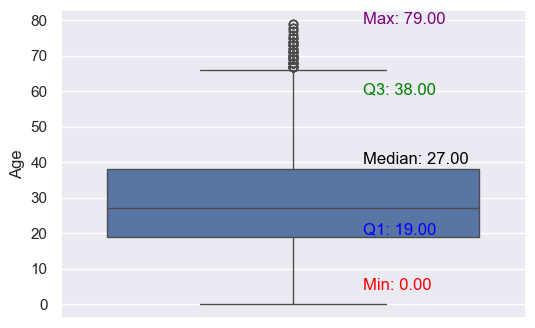

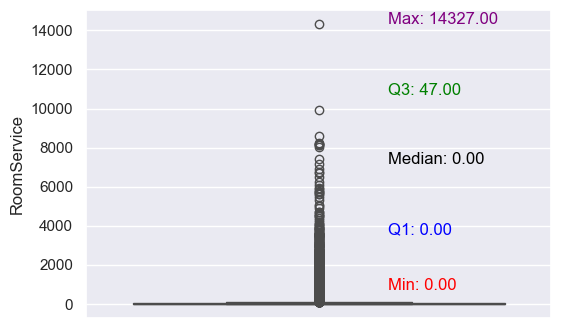

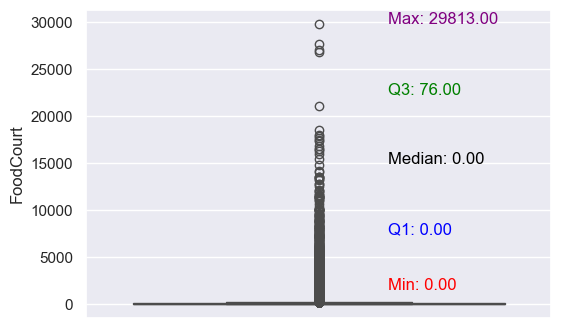

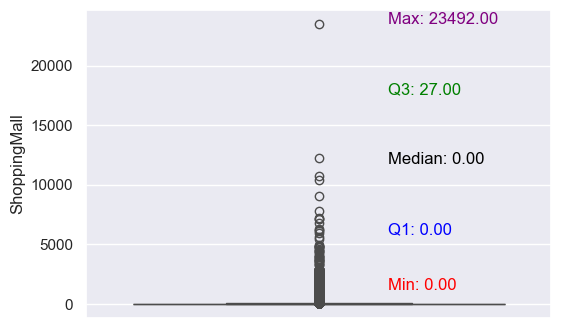

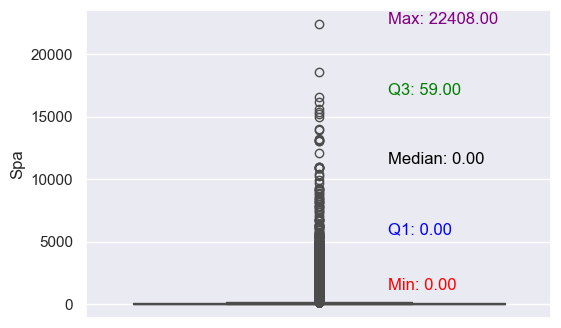

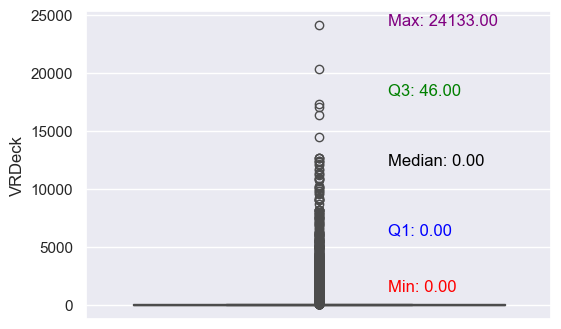

In [133]:
continous_features = train.select_dtypes(include=np.number).columns

for column in continous_features:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.boxplot(data = train[column])
    
    median = train[column].median()
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    min_val = train[column].min()
    max_val = train[column].max()
    
    plt.text(0.15, max_val*0.5, f'Median: {median:.2f}', color='black')
    plt.text(0.15, max_val*0.25, f'Q1: {q1:.2f}',color='blue')
    plt.text(0.15, max_val*0.75, f'Q3: {q3:.2f}', color='green')
    plt.text(0.15, max_val*0.05, f'Min: {min_val:.2f}', color='red')
    plt.text(0.15, max_val, f'Max: {max_val:.2f}', color='purple')